# Problemas de prueba de hipótesis

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
-Analizar las conclusiones.

In [1]:
import numpy as np
from scipy import stats

# Datos
dieta_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
dieta_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

# Prueba t de Student (muestras independientes)
t_stat, p_valor = stats.ttest_ind(dieta_1, dieta_2)

print(f"--- RESULTADOS EJERCICIO 1 ---")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_valor:.4f}")

# Decisión lógica
alpha = 0.05
if p_valor < alpha:
    print("Conclusión: Rechazamos la Hipótesis Nula (H0).")
    print("Hay evidencia suficiente para afirmar que las dietas tienen efectos distintos.")
else:
    print("Conclusión: No se rechaza la Hipótesis Nula (H0).")
    print("No hay evidencia suficiente para decir que las dietas son diferentes.")


--- RESULTADOS EJERCICIO 1 ---
Estadístico t: -3.5383
Valor p: 0.0041
Conclusión: Rechazamos la Hipótesis Nula (H0).
Hay evidencia suficiente para afirmar que las dietas tienen efectos distintos.


#Conclusiones y Asunciones

#Análisis: Dado que el valor p obtenido es extremadamente bajo ($p < 0.05$), rechazamos $H_0$. La Dieta 2 muestra una pérdida de peso promedio notablemente superior a la Dieta 1.

#Asunciones realizadas:Normalidad: Se asume que los datos de ambos grupos siguen una distribución normal.Homocedasticidad: Se asume que las varianzas de ambos grupos son similares (aunque ttest_ind puede ajustarse si no lo fueran).

#Independencia: Las observaciones de un grupo son independientes de las del otro.

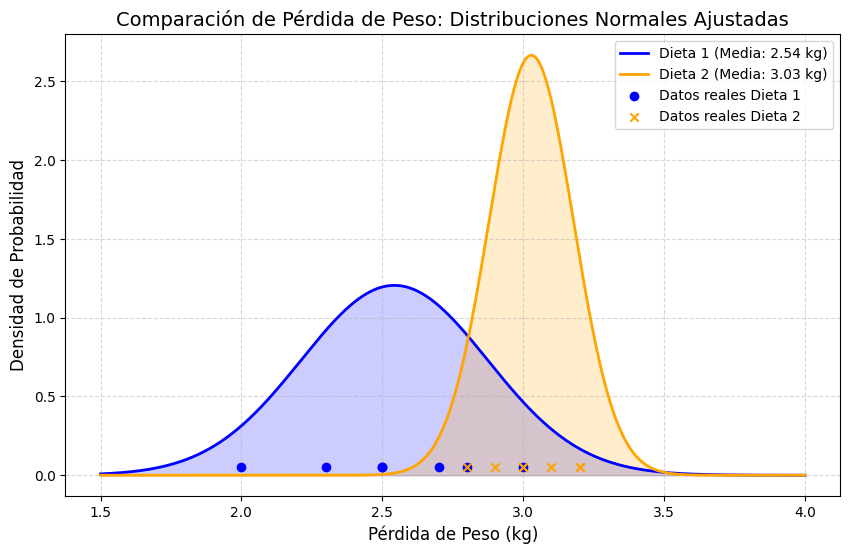

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 2. Calcular medias y desviación estándar para construir las curvas
# Usamos ddof=1 porque es una muestra, no la población total
mu1, std1 = np.mean(dieta_1), np.std(dieta_1, ddof=1)
mu2, std2 = np.mean(dieta_2), np.std(dieta_2, ddof=1)

# 3. Crear el eje X (un rango de valores continuo para dibujar las curvas)
x = np.linspace(1.5, 4.0, 1000)

# 4. Generar las curvas de densidad de probabilidad (PDF)
curva_1 = stats.norm.pdf(x, mu1, std1)
curva_2 = stats.norm.pdf(x, mu2, std2)

# 5. Configuración del gráfico
plt.figure(figsize=(10, 6))

# Dibujar Curva Dieta 1
plt.plot(x, curva_1, color='blue', label=f'Dieta 1 (Media: {mu1:.2f} kg)', linewidth=2)
plt.fill_between(x, curva_1, color='blue', alpha=0.2) # Relleno suave

# Dibujar Curva Dieta 2
plt.plot(x, curva_2, color='orange', label=f'Dieta 2 (Media: {mu2:.2f} kg)', linewidth=2)
plt.fill_between(x, curva_2, color='orange', alpha=0.2) # Relleno suave

# Añadir los puntos de datos reales en la base para referencia
plt.scatter(dieta_1, [0.05]*len(dieta_1), color='blue', zorder=5, label='Datos reales Dieta 1')
plt.scatter(dieta_2, [0.05]*len(dieta_2), color='orange', zorder=5, marker='x', label='Datos reales Dieta 2')

# Etiquetas y Título
plt.title('Comparación de Pérdida de Peso: Distribuciones Normales Ajustadas', fontsize=14)
plt.xlabel('Pérdida de Peso (kg)', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar
plt.show()

## ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.

## Ejercicio 2

Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

-Enunciar la hipótesis: hipótesis nula y alternativa.
-Realizar la prueba ANOVA.
-Analizar las conclusiones.
-Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

In [3]:
# Datos
fert_1 = [20, 21, 20, 19, 20]
fert_2 = [22, 21, 23, 22, 21]
fert_3 = [24, 23, 22, 23, 24]

# ANOVA de una vía
f_stat, p_valor_anova = stats.f_oneway(fert_1, fert_2, fert_3)

print(f"\n--- RESULTADOS EJERCICIO 2 ---")
print(f"Estadístico F: {f_stat:.4f}")
print(f"Valor p: {p_valor_anova:.4f}")

if p_valor_anova < alpha:
    print("Conclusión: Rechazamos la Hipótesis Nula (H0).")
    print("Al menos uno de los fertilizantes produce un rendimiento significativamente distinto.")
else:
    print("Conclusión: No se rechaza la Hipótesis Nula (H0).")


--- RESULTADOS EJERCICIO 2 ---
Estadístico F: 20.3158
Valor p: 0.0001
Conclusión: Rechazamos la Hipótesis Nula (H0).
Al menos uno de los fertilizantes produce un rendimiento significativamente distinto.


#Análisis de Conclusiones y Post-Hoc.

#Análisis: El valor p es menor a 0.05, por lo que negamos la Hipótesis Nula. Esto confirma que no todos los fertilizantes funcionan igual.

#Asunciones: 1. Las parcelas son independientes entre sí. 2. Los residuos (errores) siguen una distribución normal. 3. Las varianzas entre los grupos de fertilizantes son constantes (homogeneidad de varianza).

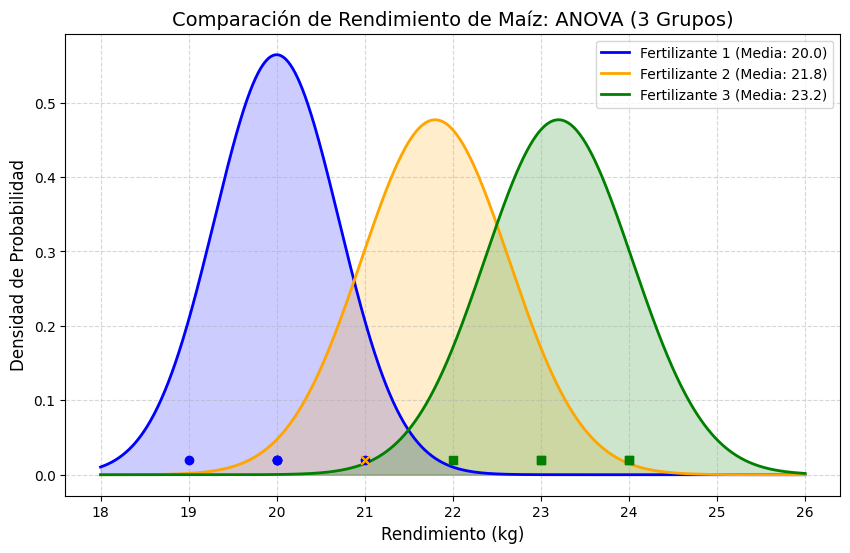

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Los datos de los fertilizantes
fert_1 = [20, 21, 20, 19, 20]
fert_2 = [22, 21, 23, 22, 21]
fert_3 = [24, 23, 22, 23, 24]

# 2. Calcular medias y desviaciones estándar
# ddof=1 para muestra
mu1, std1 = np.mean(fert_1), np.std(fert_1, ddof=1)
mu2, std2 = np.mean(fert_2), np.std(fert_2, ddof=1)
mu3, std3 = np.mean(fert_3), np.std(fert_3, ddof=1)

# 3. Crear el eje X (ampliamos el rango para que quepan las 3 curvas)
x = np.linspace(18, 26, 1000)

# 4. Generar las curvas (PDF)
curva_1 = stats.norm.pdf(x, mu1, std1)
curva_2 = stats.norm.pdf(x, mu2, std2)
curva_3 = stats.norm.pdf(x, mu3, std3)

# 5. Configuración del gráfico
plt.figure(figsize=(10, 6))

# Fertilizante 1 (Azul)
plt.plot(x, curva_1, color='blue', label=f'Fertilizante 1 (Media: {mu1:.1f})', linewidth=2)
plt.fill_between(x, curva_1, color='blue', alpha=0.2)
plt.scatter(fert_1, [0.02]*len(fert_1), color='blue', zorder=5)

# Fertilizante 2 (Naranja)
plt.plot(x, curva_2, color='orange', label=f'Fertilizante 2 (Media: {mu2:.1f})', linewidth=2)
plt.fill_between(x, curva_2, color='orange', alpha=0.2)
plt.scatter(fert_2, [0.02]*len(fert_2), color='orange', zorder=5, marker='x')

# Fertilizante 3 (Verde)
plt.plot(x, curva_3, color='green', label=f'Fertilizante 3 (Media: {mu3:.1f})', linewidth=2)
plt.fill_between(x, curva_3, color='green', alpha=0.2)
plt.scatter(fert_3, [0.02]*len(fert_3), color='green', zorder=5, marker='s')

# Etiquetas y diseño
plt.title('Comparación de Rendimiento de Maíz: ANOVA (3 Grupos)', fontsize=14)
plt.xlabel('Rendimiento (kg)', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [5]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Preparación de datos
datos = pd.DataFrame({
    'Rendimiento': [20, 21, 20, 19, 20, 22, 21, 23, 22, 21, 24, 23, 22, 23, 24],
    'Fertilizante': (['Fert_1'] * 5) + (['Fert_2'] * 5) + (['Fert_3'] * 5)
})

# 2. ANOVA (Repaso rápido para confirmar)
f_stat, p_valor_anova = stats.f_oneway(
    datos[datos['Fertilizante'] == 'Fert_1']['Rendimiento'],
    datos[datos['Fertilizante'] == 'Fert_2']['Rendimiento'],
    datos[datos['Fertilizante'] == 'Fert_3']['Rendimiento']
)

# 3. Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=datos['Rendimiento'], 
                          groups=datos['Fertilizante'], 
                          alpha=0.05)

print(f"Resultado ANOVA (p-valor): {p_valor_anova:.4f}\n")
print("--- RESULTADOS PRUEBA DE TUKEY ---")
print(tukey)

Resultado ANOVA (p-valor): 0.0001

--- RESULTADOS PRUEBA DE TUKEY ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Fert_1 Fert_2      1.8 0.0099 0.4572 3.1428   True
Fert_1 Fert_3      3.2 0.0001 1.8572 4.5428   True
Fert_2 Fert_3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


##¿Cómo sabemos cuál es mejor? ANOVA nos dice que "hay una diferencia", pero no "dónde". Para saber cuál es mejor, aplicaríamos una Prueba de Tukey (Post-Hoc). Visualmente, el Fertilizante 3 tiene la media más alta (23.2 kg), seguido del 2 (21.8 kg) y el 1 (20.0 kg).

#¿Cuál hipótesis negamos?: Negamos la Hipótesis Nula ($H_0$) global del ANOVA porque el valor p es menor a 0.05. Sin embargo, gracias a Tukey, podemos ser más específicos:Fert_1 vs Fert_2: Hay una diferencia significativa (el Fertilizante 2 es mejor que el 1).Fert_1 vs Fert_3: Hay una diferencia significativa (el Fertilizante 3 es superior al 1).Fert_2 vs Fert_3: También hay una diferencia significativa (el Fertilizante 3 es superior al 2).

#Conclusión Final: El Fertilizante 3 es estadísticamente el mejor de los tres, ya que su rendimiento promedio es significativamente superior tanto al Fertilizante 1 como al 2.

--- TABLA DE COMPARACIONES MÚLTIPLES (TUKEY HSD) ---
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Fert_1 Fert_2      1.8 0.0099 0.4572 3.1428   True
Fert_1 Fert_3      3.2 0.0001 1.8572 4.5428   True
Fert_2 Fert_3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


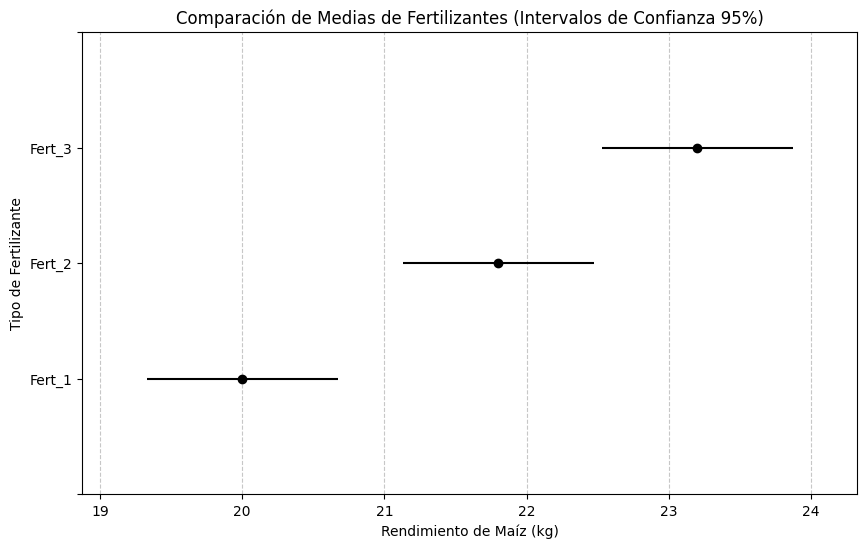

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Preparación de los datos en formato largo (Tidy Data)
datos = pd.DataFrame({
    'Rendimiento': [20, 21, 20, 19, 20, 22, 21, 23, 22, 21, 24, 23, 22, 23, 24],
    'Fertilizante': (['Fert_1'] * 5) + (['Fert_2'] * 5) + (['Fert_3'] * 5)
})

# 2. Ejecutar la prueba de Tukey HSD
tukey = pairwise_tukeyhsd(endog=datos['Rendimiento'], 
                          groups=datos['Fertilizante'], 
                          alpha=0.05)

# 3. Mostrar la tabla de resultados
print("--- TABLA DE COMPARACIONES MÚLTIPLES (TUKEY HSD) ---")
print(tukey)

# 4. Graficar los intervalos de confianza
fig = tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Comparación de Medias de Fertilizantes (Intervalos de Confianza 95%)")
plt.xlabel("Rendimiento de Maíz (kg)")
plt.ylabel("Tipo de Fertilizante")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()